## Exploring the MNIST data set, PCA and agglomerative hierarchical clustering methods

In this assignment you will experiment and evaluate the hierarchical agglomerative clustering methods under different settings. You will work on the MNIST data set, which is a collection of hand-written digits. Due to its manageable size and popularity MNIST is a dataset you can go to for evaluating new ideas, for replicating research results, etc.

This assignment will comprise a series of small exercises. Some of the background material, e.g. `numpy`, `sklearn`, etc., will be presented during the next lectures, however you are expected to actively look for information on the web, using Python's `help` function, etc. 

The marks awarded for each exercise are indicated below and they total 35. The final mark will be rescaled to a maximum of 10.

##### Insert all imports in the cell immediately below and nowhere else in this notebook

In [1]:
import sys
import random
import sklearn
import numpy as np
from sklearn.cluster import *
import matplotlib.pyplot as plt
from numpy import set_printoptions
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler

#### Fetch the MNIST data set if not already present in the current working directory:

In [2]:
mnist = fetch_mldata('mnist-original', data_home='.')

### Explore the MNIST dataset
MNIST is one of the most famous ML datasets and it contains 70,000 hand-written digits and their labels. Using `sklearn` to fetch the dataset, as above, `mnist.data` contains the data, while `mnist.target` contains the labels. 

#### (1) Find how many data points there are available and what is their size [1 mark]
 There are 70.000 data points with size 784
#### (2) How many labels are there? [1 mark]
 There are 70.000 labels
 ##### Labels can take the following values: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 

In [3]:
mnist.data.shape 

(70000, 784)

In [4]:
mnist.target.size  

70000

In [5]:
np.unique(mnist.target)  

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

#### (3) Extract a random subset of the original data and labels and store them in variables `small_data` and `small_target`. In the remainder of this exercise we will work with these smaller sets. The cardinality of the `small_*` subsets should be 2000. [2 marks]

In [6]:
idx = np.random.choice(np.arange(len(mnist.data)), 2000, replace=False)
small_data = mnist.data[idx]
small_target = mnist.target[idx]

#### (4) Create a function to display a single digit from the MNIST data set and its label. When done, use your function to display one of the digits. Use `small_data` (as opposed to `mnist.data`). [2 marks]

In [7]:
def show_digit(ind, dataset, targets):
    """Display the MNIST digit at index `ind` in grayscale"""
    image = np.reshape(dataset[ind], (28, 28)) # reshape the data so as to be able to show the image
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
    return (targets[ind])

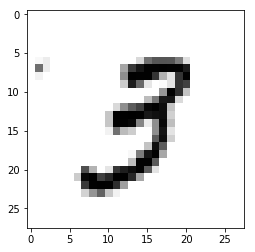

3.0

In [8]:
show_digit(300, small_data, small_target)

As a pre-processing step either for further processing or visualisation we decompose raw data into their principal components using Principal Component Analysis (PCA). This allows us to reduce the dimensionality of the data while retaining as much of their original variance as possible. `sklearn` provides PCA in the module `sklearn.decomposition`. 

#### (5) Decompose the original data into 2 components in order to be displayable on a 2D graph. Verify PCA does what is expected. [1 mark]

In [9]:
pca = PCA(n_components=2)
data2d = pca.fit_transform(small_data)
data2d.shape # we verify that PCA does what is expected because number 2 in the tuple shows that

(2000, 2)

#### (6) Plot all 2D (decomposed) points on a scatter plot [1 mark]

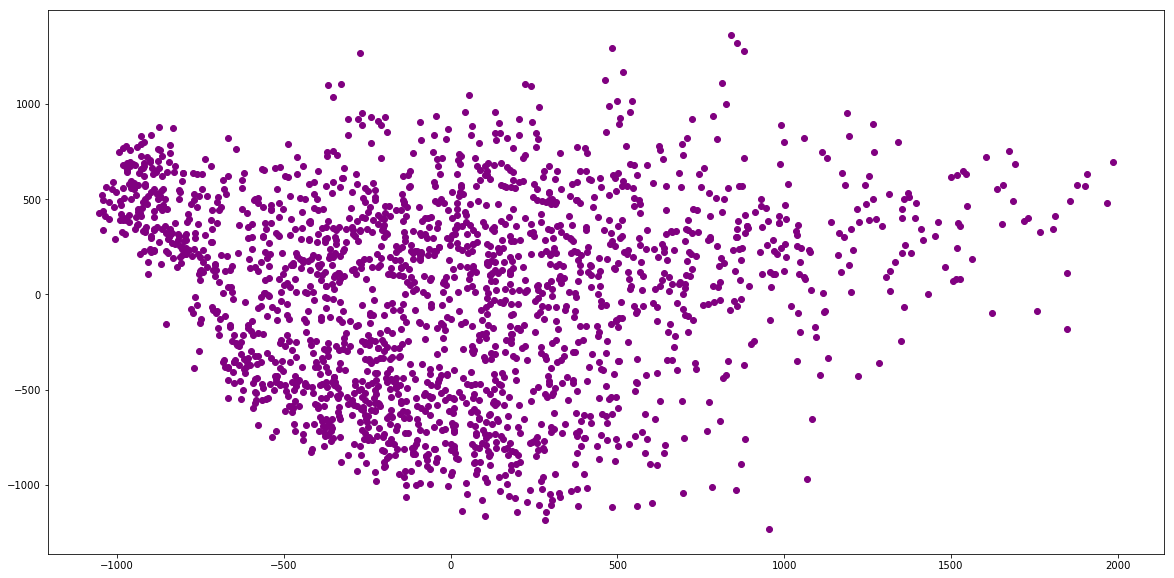

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(data2d[:,0], data2d[:,1], color='purple')
plt.show()

Depending on the data analysis we want to perform, we are often better off scaling raw data down to some desirable range and recentering them around a mean of 0. `sklearn` contains the necessary tools for this, or you can implement it yourselves.

#### (7) Scale the original data so that they have a mean of 0 and a stdev of 1. Verify your results. [2 marks]

In [11]:
scaled_data = StandardScaler().fit_transform(small_data)
print (np.mean(scaled_data))
print (np.std(scaled_data))  # we verify the results by printing the mean which is close to 0 and standard deviation which is close to 1

2.19325691395e-18
0.903507902905


/home/mscuser/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


#### (8) Decompose the scaled points to 2 components and plot the resulting 2D points. Are there notable differences with the plot before scaling? [1 mark]
 The difference seems to be that in the plot with the scaled data the points  seem to be more concentrated around 0.  

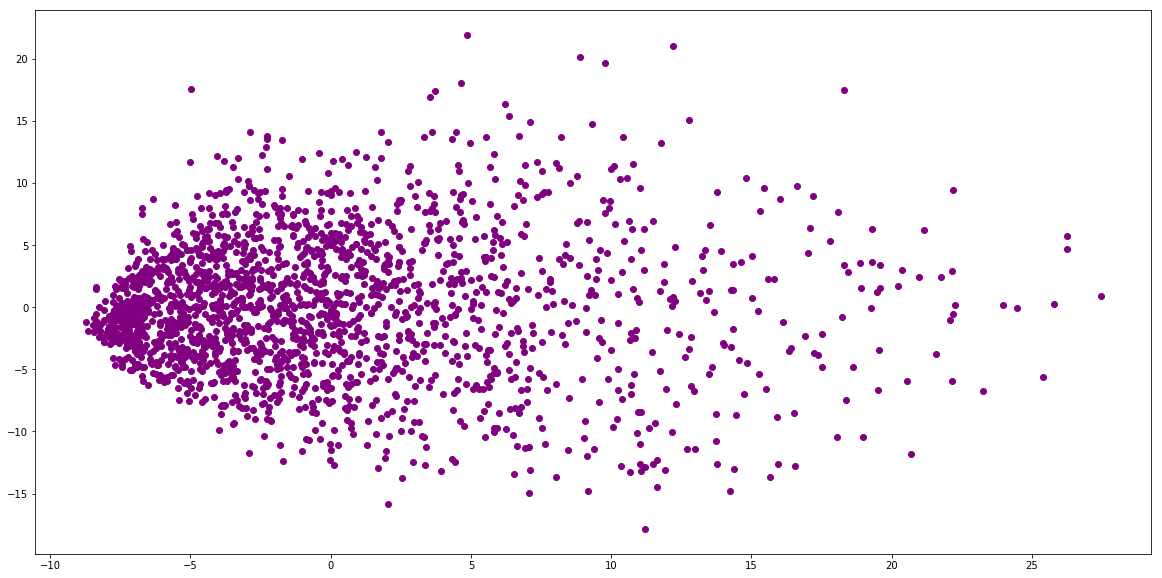

In [12]:
scaled_data2d = pca.fit_transform(scaled_data)
plt.figure(figsize=(20,10))
plt.scatter(scaled_data2d[:,0], scaled_data2d[:,1], color='purple')
plt.show()

#### (9) Cluster your original and your scaled data using Ward's hierarchical agglomerative clustering method. [2 marks]

In [13]:
ward_clustering = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
ward_clustering.fit(small_data)

ward_clustering_scaled = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
ward_clustering_scaled.fit(scaled_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f1288b09f50>)

#### (10) Plot the clustering outcome similar to the 2D plot above, using a different colour for each predicted class. [2 marks]

In [14]:
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)

    plt.figure(figsize=(20, 10))
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], int(small_target[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

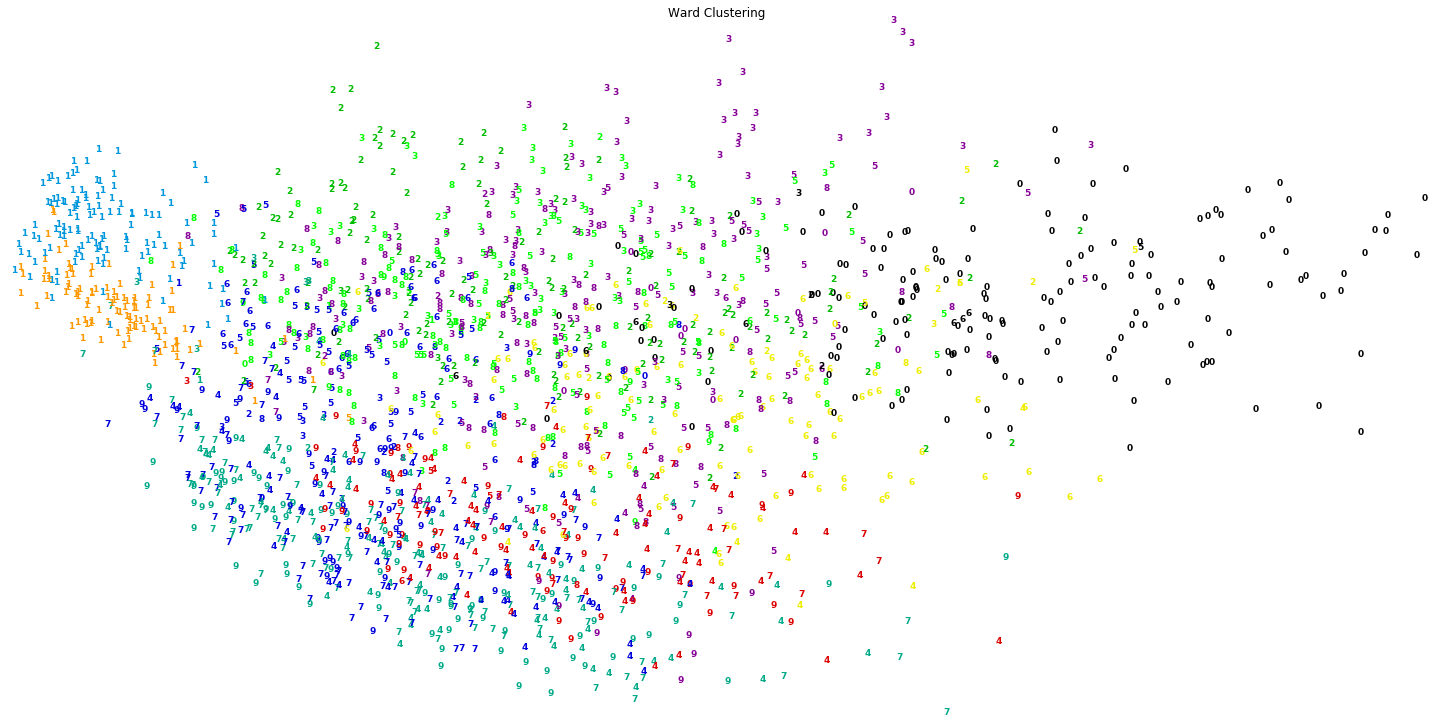

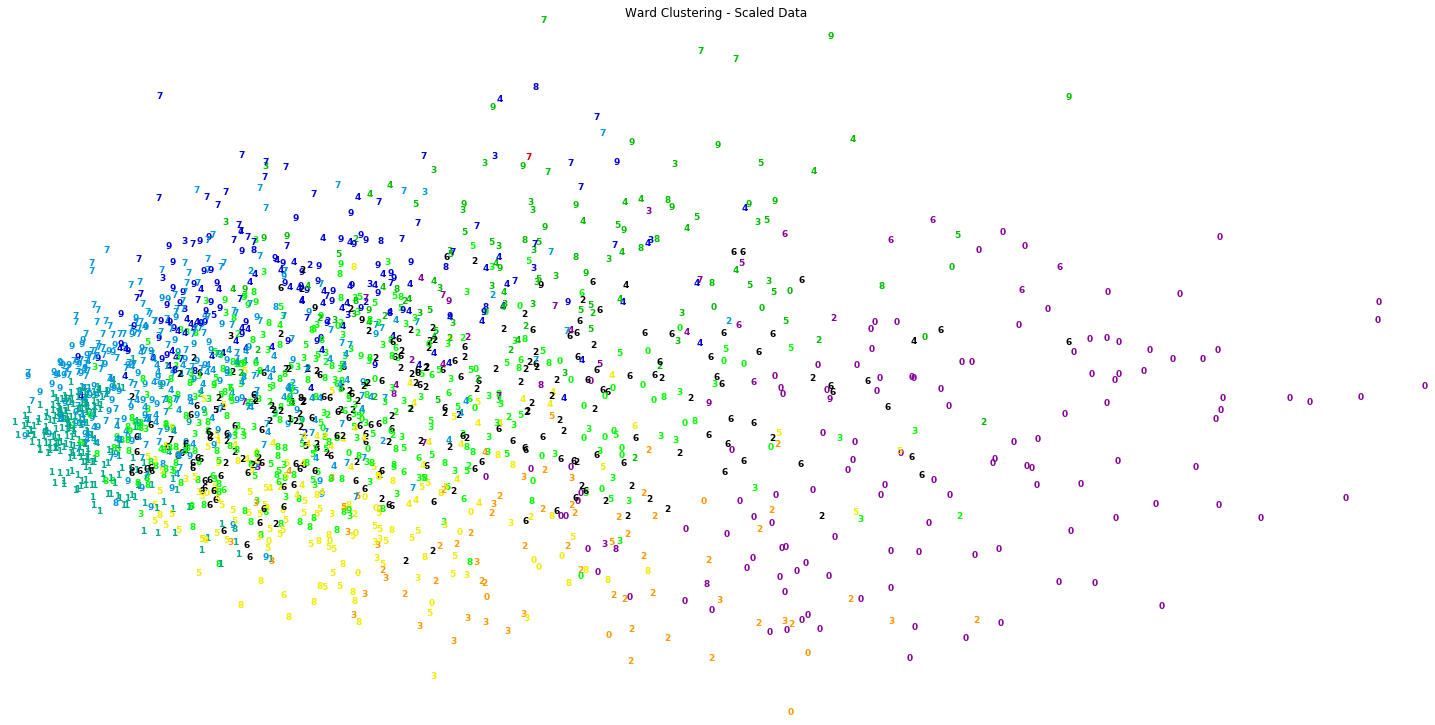

In [15]:
plot_clustering(data2d, ward_clustering.labels_)
plt.title("Ward Clustering")
plot_clustering(scaled_data2d, ward_clustering_scaled.labels_)
plt.title("Ward Clustering - Scaled Data")
plt.show()

#### (11) Repeat the clustering using complete-link and average-link (instead of Ward) and plot as above. What do you observe? Which seems to be the better clustering method for the data and why? [2 marks]
 The best clustering method for the data seems to be the one using the ward linkage, because it seems that the clusters are more discrete this way.

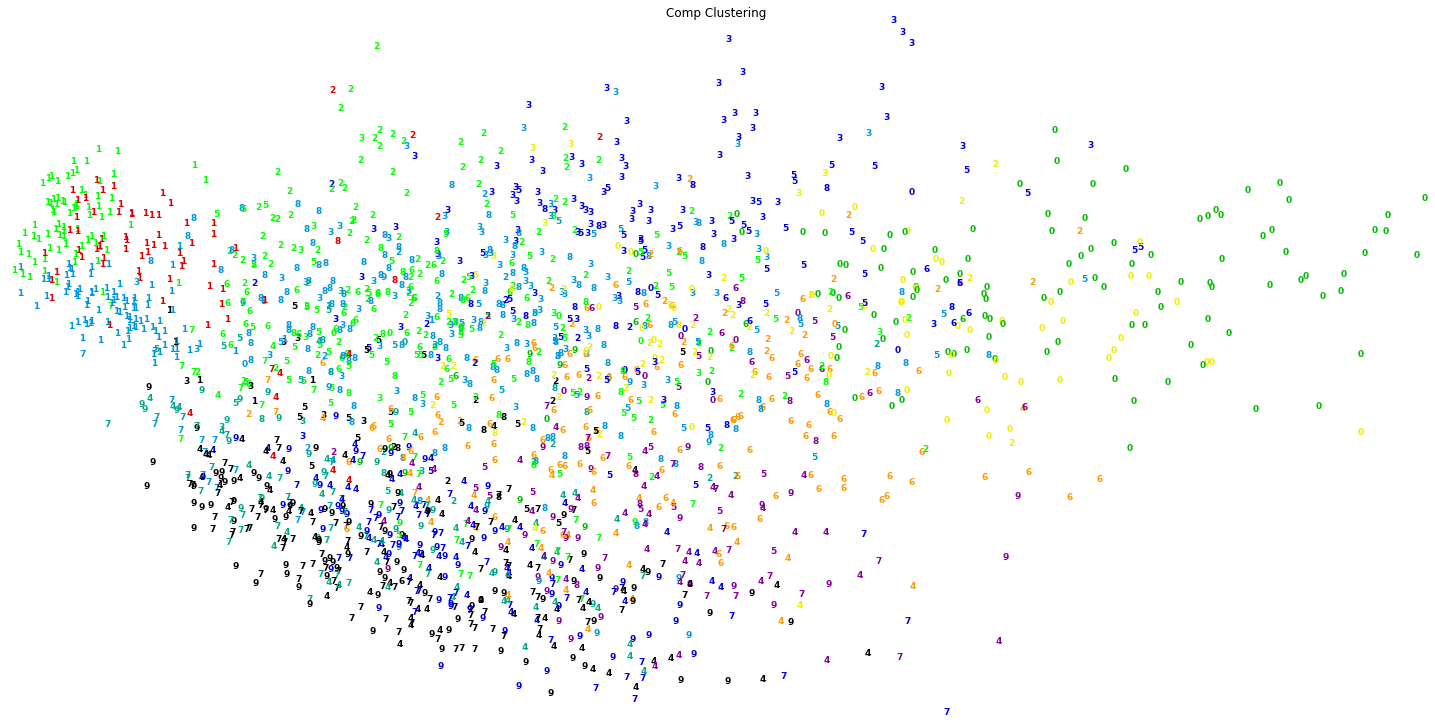

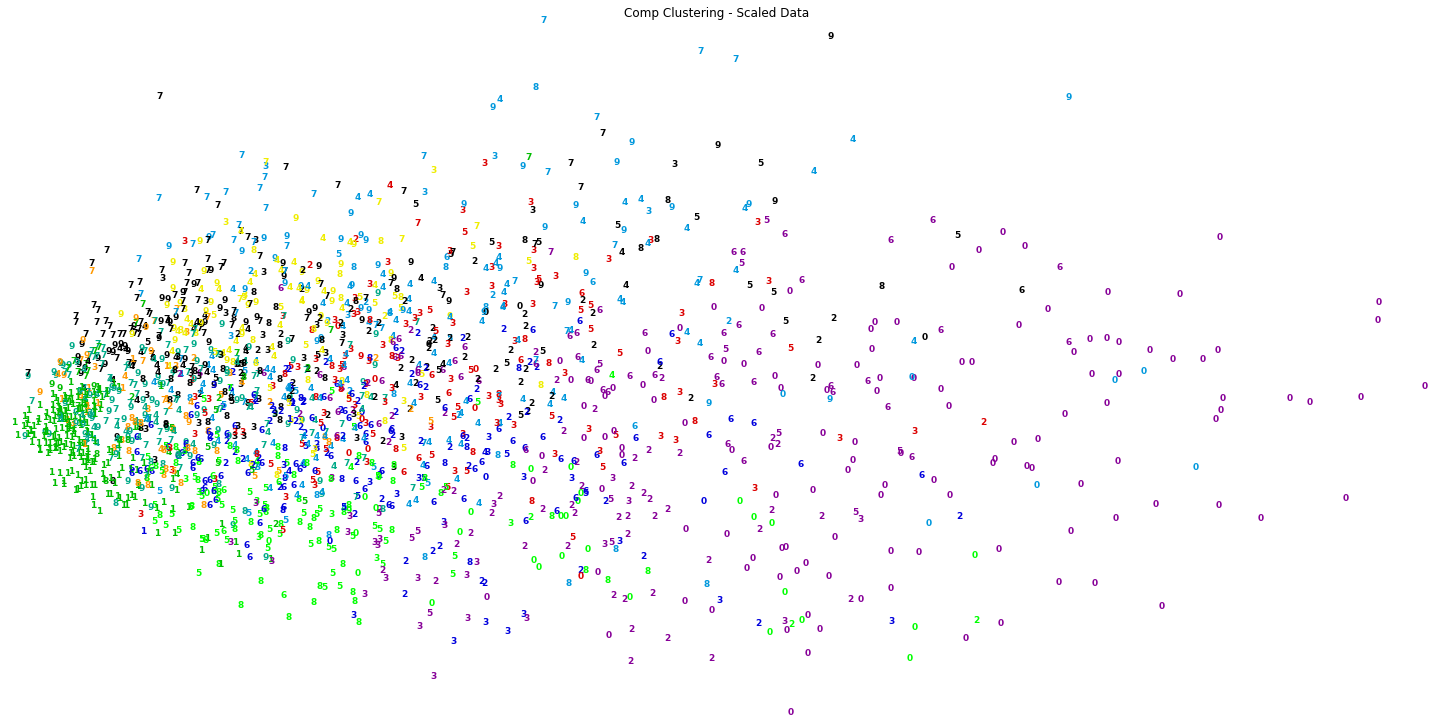

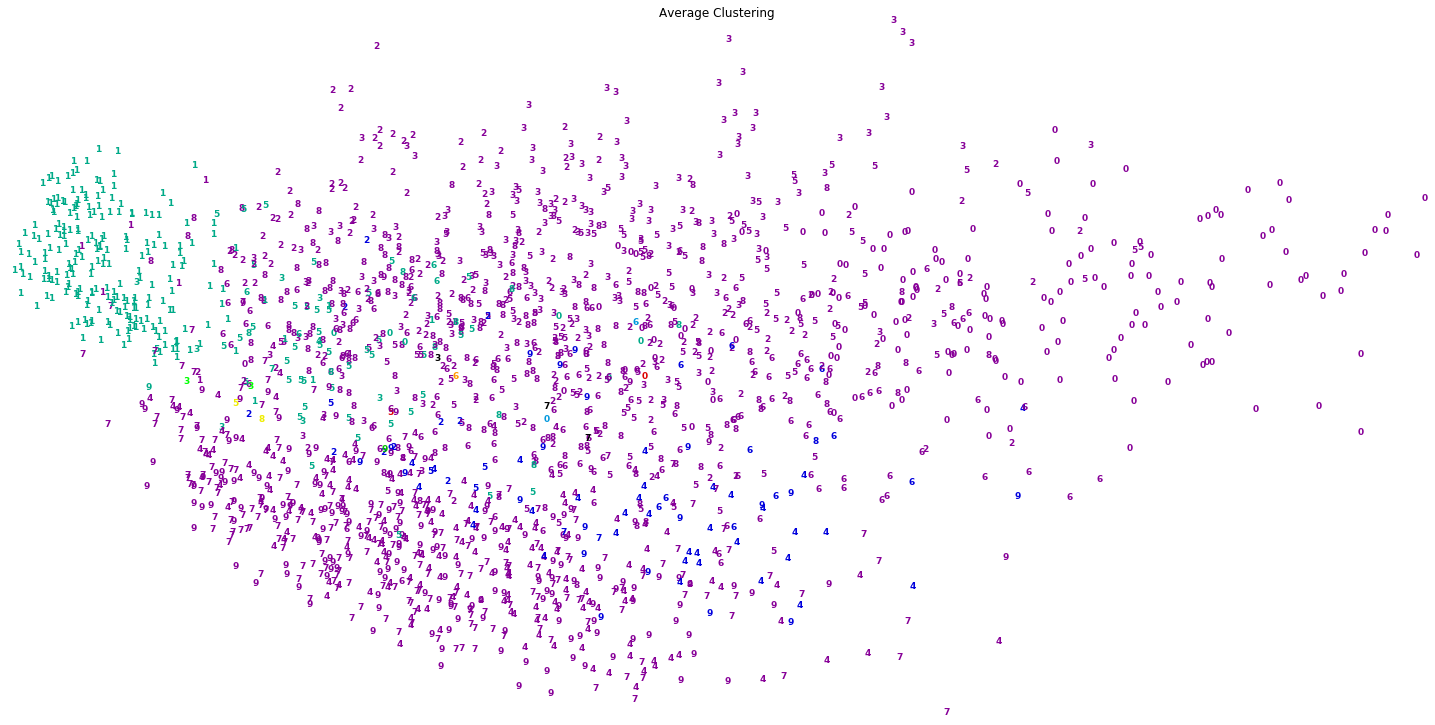

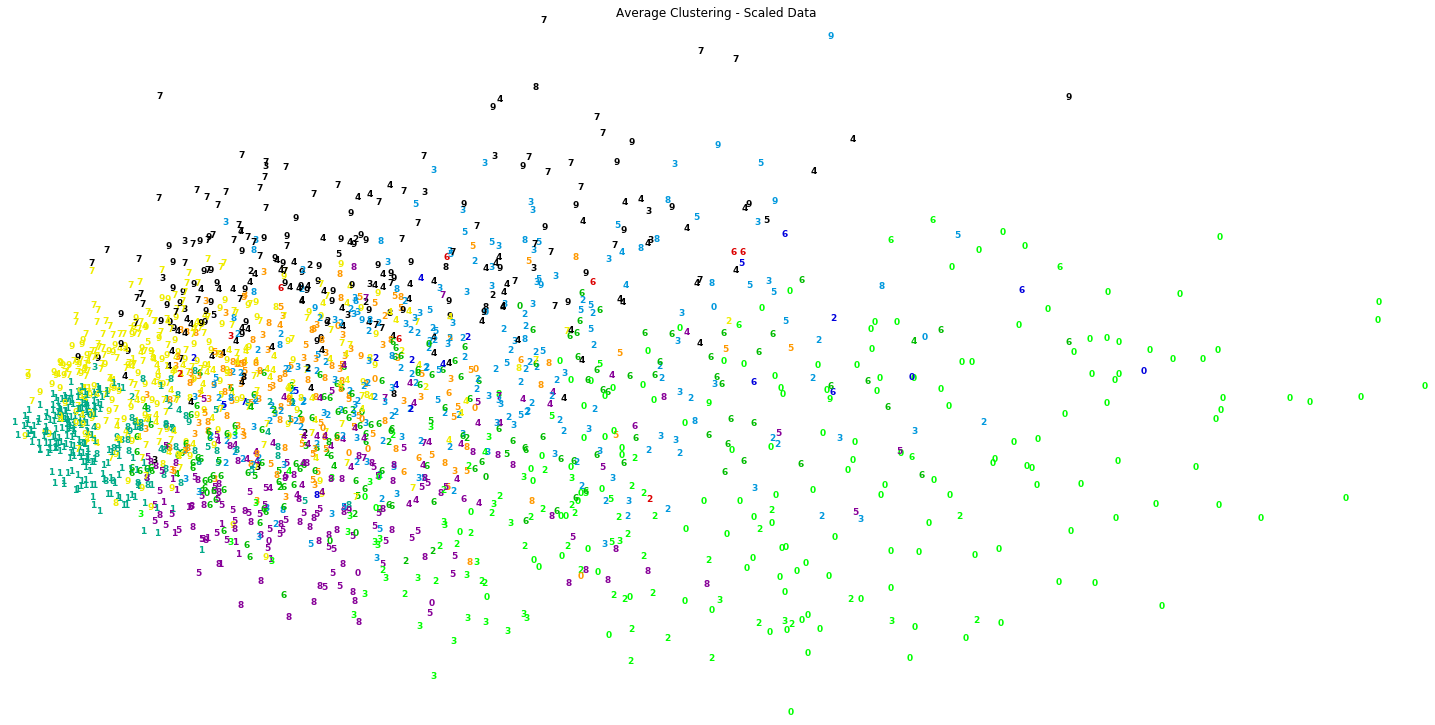

In [16]:
comp_clustering = AgglomerativeClustering(n_clusters=10, affinity='cosine', linkage='complete')
comp_clustering.fit(small_data)

comp_clustering_scaled = AgglomerativeClustering(n_clusters=10, affinity='cosine', linkage='complete')
comp_clustering_scaled.fit(scaled_data)

avg_clustering = AgglomerativeClustering(n_clusters=10, affinity='cosine', linkage='average')
avg_clustering.fit(small_data)

avg_clustering_scaled = AgglomerativeClustering(n_clusters=10, affinity='cosine', linkage='average')
avg_clustering_scaled.fit(scaled_data)

plot_clustering(data2d, comp_clustering.labels_)
plt.title("Comp Clustering")
plot_clustering(scaled_data2d, comp_clustering_scaled.labels_)
plt.title("Comp Clustering - Scaled Data")
plot_clustering(data2d, avg_clustering.labels_)
plt.title("Average Clustering")
plot_clustering(scaled_data2d, avg_clustering_scaled.labels_)
plt.title("Average Clustering - Scaled Data")
plt.show()

Now we will try to measure the accuracy of our clusters using our labels. Note that as clustering is unsupervised we have no deterministic way of knowing which cluster corresponds to which real label. However we can make use of the fact that we knew the number of classes of the dataset (10).

A simple way of measuring our clustering accuracy is the following. For each real label find the cluster which contains most of its digits. Assume that this is the cluster corresponding to this label and measure its accuracy (number of correct digits/size of the cluster). Last, average over all accuracy measures to produce the overall accuracy.

#### (12) Implement a function to measure the overall accuracy of such a clustering procedure given a clustering outcome and a labels array. Use this function to measure the accuracy of `ward_clustering` and `comp_clustering`. Do you notice any potential problems with this approach? [3 marks]
 The problem with this approach is that we will probably not use some of the clusters for our measurements, because there is a possibility that we will "assign" the same cluster in two or more real labels, as the real label might exist in majority (in relation to the other labels), in more than one cluster. 

In [17]:
def clustering_acc(clustering, labels):
    """Measure the overall accuracy of the given `clustering` given the `labels`"""
    accuracy_list = []
    for i in np.unique(labels):
        
        # makes a list of the plurality of each digit in each cluster for every real label:
        no_digits = [np.sum(clustering.labels_[labels == i] == j) for j in np.unique(clustering.labels_)]
        
        # finds the index of the maximum plurality, which is also the cluster corresponding to this label, as we assumed 
        maxIndex = max(xrange(len(no_digits)), key = lambda x: no_digits[x]) 
        
        # calculates the number of the correct digits in the cluster
        no_correct_digits = np.sum(clustering.labels_[labels == i] == maxIndex)
        size_of_cluster = float((clustering.labels_[labels == i].size))
        
        # calculates the accuracy of each cluster and appends it to a list
        accuracy_list.append(no_correct_digits / float(size_of_cluster))
    
    # returns the average of the accuracy of each cluster
    return (sum(accuracy_list)/float(len(accuracy_list)))

acc_ward = clustering_acc(ward_clustering, small_target)
acc_comp = clustering_acc(comp_clustering, small_target)
acc_avg = clustering_acc(avg_clustering, small_target)
print 'Ward\'s method:', acc_ward
print 'Complete link:', acc_comp
print 'Average link: ', acc_avg

Ward's method: 0.567033785155
Complete link: 0.475320130975
Average link:  0.910040969824


### PCA for reducing features before clustering

So far we've used PCA for displaying our data on a 2D plot. PCA can be also used to reduce the dimensionality of our samples. This results in a smaller and often more robust representation of our original data.

#### (13) Reduce `small_data` to 10 features and recalculate the accuracies for Ward's method, complete- and average-link. How do they differ in comparison to using the complete feature set? (There is no need to plot anything for this step.) [2 marks]
 The new accuracies are lower than before and this makes sense as there is a loss of information when we reduce the data to 10 features

In [18]:
pca10 = PCA(n_components=10)
scaled_data10d = pca10.fit_transform(small_data)
scaled_data10d.shape # we verify that PCA does what is expected because number 10 in the tuple shows that

(2000, 10)

In [19]:
ward_clustering_10d = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
ward_clustering_10d.fit(scaled_data10d)

comp_clustering_10d = AgglomerativeClustering(n_clusters=10, affinity='cosine', linkage='complete')
comp_clustering_10d.fit(scaled_data10d)

avg_clustering_10d = AgglomerativeClustering(n_clusters=10, affinity='cosine', linkage='average')
avg_clustering_10d.fit(scaled_data10d)

acc_ward_10d = clustering_acc(ward_clustering_10d, small_target)
acc_comp_10d = clustering_acc(comp_clustering_10d, small_target)
acc_avg_10d = clustering_acc(avg_clustering_10d, small_target)
print 'Ward\'s method:', acc_ward_10d
print 'Complete link:', acc_comp_10d
print 'Average link: ', acc_avg_10d

Ward's method: 0.606612556972
Complete link: 0.49454851479
Average link:  0.630865851917


#### (14) Write a new function combining feature reduction and hierarchical clustering, returning an accuracy figure based on `clustering_acc()` you have created before and the clustering produced. Use the function signature below. [2 marks]

In [20]:
def reduce_and_hcluster(n_comp, linkage, data=scaled_data, labels=small_target, n_clusters=10):
    """Reduce and cluster the given data using hierarchical clustering
    Arguments:
        n_comp: the number of components to reduce the data to
        data: the data matrix
        labels: the correct labels, one for each data sample
        linkage: the clustering method to use. It can be 'ward', 
                 'complete' or 'average'
        n_clusters: the number of clusters to take into account
    Return:
        (The accuracy of the clustering with respect to the target labels, 
        the clustering produced)
    """
    # reduce the data into n_comp components
    pca = PCA(n_components=n_comp)
    data_pca = pca.fit_transform(data)
    
    # cluster the data according to the linkage
    if linkage == 'ward':
        clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=linkage)
    else:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage=linkage)
        
    clustering.fit(data_pca)
    
    # calling the function clustering_acc() to measure the accuracy
    accuracy = clustering_acc(clustering, labels)
    
    return accuracy, clustering

#### (15) Using `reduce_and_hcluster()`, write a loop to calculate the accuracies for all three different linkages (ward, complete and average), for reduction of n_comp=4 to 80 with a step of 2 (i.e. for n_comp=4, 6, 8, ..., 80). Store the results in three separate lists, as indicated below. Also store the best (most accurate) clustering for each linkage. [2 marks] 

In [21]:
linkages = ['ward', 'complete', 'average']
ward_accs = []
comp_accs = []
avg_accs = []

for linkage in linkages:
    for n_comp in range(4, 80, 2):
        acc, clust = reduce_and_hcluster(n_comp, linkage)
        if linkage == 'ward':
            ward_accs.append((acc, clust))
        elif linkage == 'complete':
            comp_accs.append((acc, clust))
        else:
            avg_accs.append((acc, clust))
            
            
best_ward = max(ward_accs,key=lambda item:item[1])[1]
best_complete = max(comp_accs,key=lambda item:item[1])[1]
best_average = max(avg_accs,key=lambda item:item[1])[1]

#### (16) Plot the accuracies for the different linkages and number of components on a 2D plot. The x-axis should increase the number of components, while the y-axis should display accuracy. For each linkage choice also plot its accuracy before reducing the dimensions, which was calculated in step 12 - these should be straight lines. The plot should include a legend, axis titles and a grid, and each line should use a different line style. Is there anything worth observing from this plot? [3 marks]
 We observe that in the methods using ward and complete linkage the accuracy for the reduced data is somewhat the same as the one for the non-reduced data, something that is not true for the method using the average linkage.

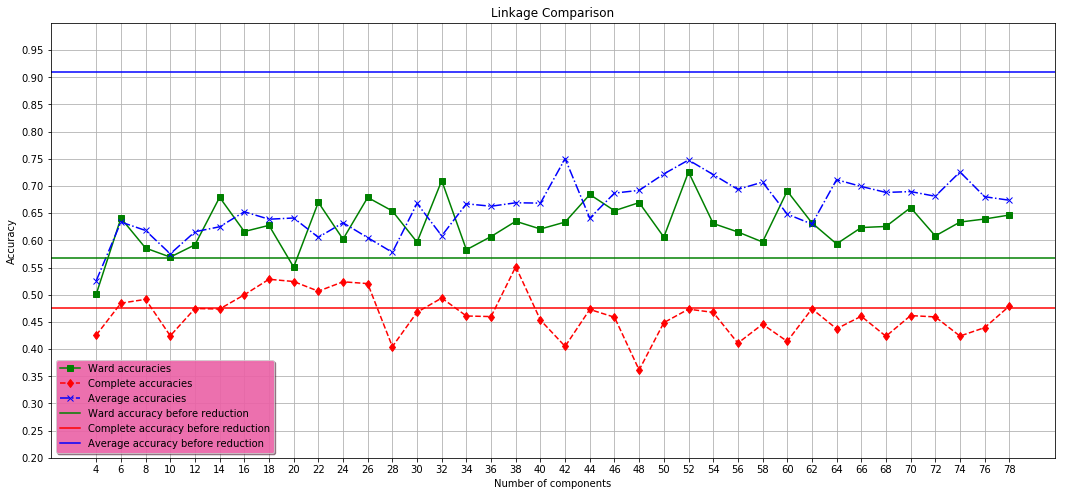

In [22]:
components = range(4, 80, 2)

plt.figure(figsize=(18, 8))
plt.title("Linkage Comparison")
plt.xlabel("Number of components")
plt.ylabel("Accuracy")

plt.ylim(0.3,1)
plt.xticks(np.arange(4, 80, 2))
plt.yticks(np.arange(0.2, 1, 0.05))
plt.grid(which='both')

plt.plot(components, [x[0] for x in ward_accs], color='green', linestyle='-', marker='s', label='Ward accuracies')
plt.plot(components, [x[0] for x in comp_accs], color='red', linestyle='--', marker='d', label='Complete accuracies')
plt.plot(components, [x[0] for x in avg_accs], color='blue', linestyle='-.', marker='x', label='Average accuracies')

plt.axhline(acc_ward, color='green', label='Ward accuracy before reduction')
plt.axhline(acc_comp, color='red', label='Complete accuracy before reduction')
plt.axhline(acc_avg, color='blue', label='Average accuracy before reduction')

legend = plt.legend(loc='lower left', shadow=True)
legend.get_frame().set_facecolor('#FF69B4')

plt.show()

Let's look at the contents of the best clustering solutions we've created in step (15).

#### (17) Complete the function below. It needs to be able to display up to 100 digits from the given cluster number in the given clustering result, using `matplotlib`. If the available digits in the cluster are more than 100, choose and display 100 at random. [4 marks] 

In [23]:
def display_100(clustering, cl_no, data=small_data, targets=small_target):
    """Display up to 100 digits from `data`, contained in the clustering product 
       `clustering` and in its cluster with number `cl_no`
    """
    # create a list of the indexes of the small_data that the clustering method has evaluated as cl_no
    true_index = [index for index in np.where(clustering.labels_ == cl_no)[0]]
    
    # if the length of the list of the indexes is larger than 100, pick randomly 100 of them
    if len(true_index) > 100:
        true_index = random.sample(true_index, 100)
        
    # for loop to display the digits
    for index in true_index:
        show_digit(index, data, targets)
             
    pass

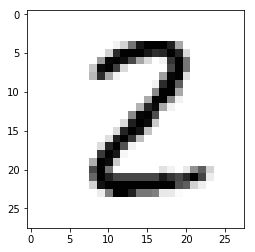

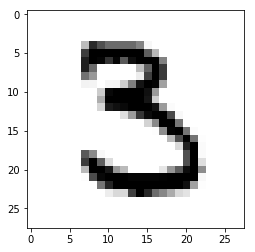

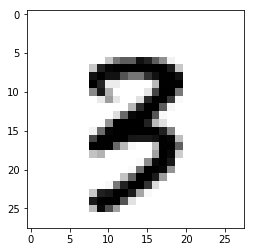

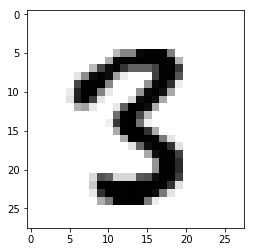

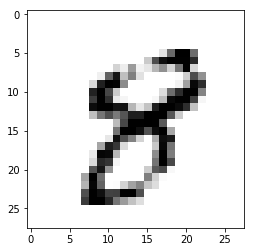

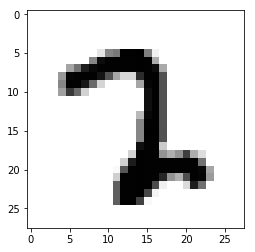

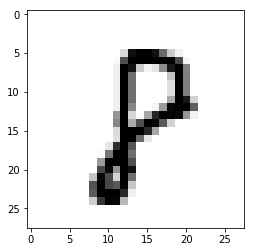

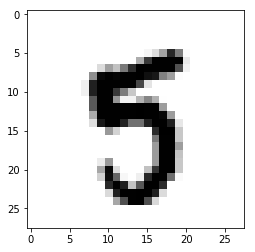

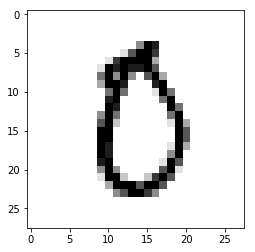

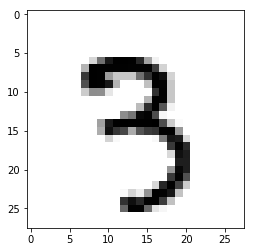

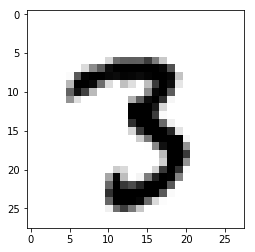

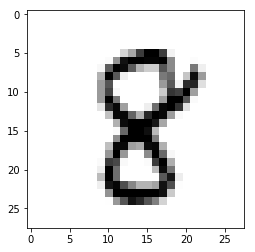

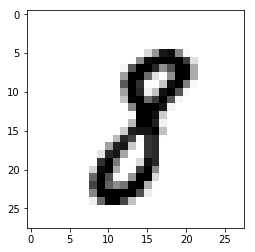

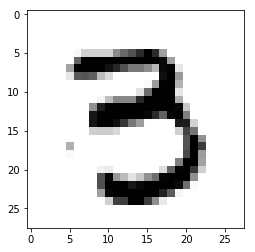

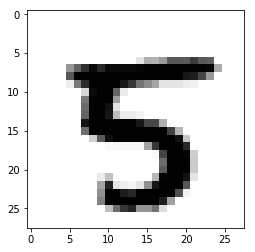

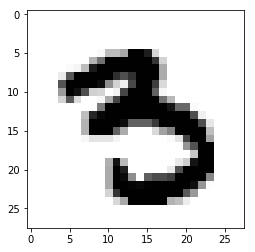

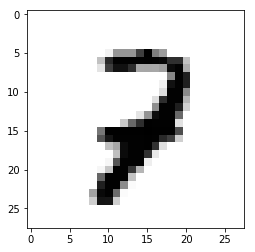

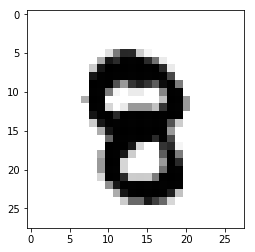

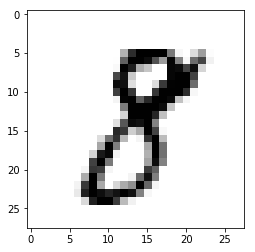

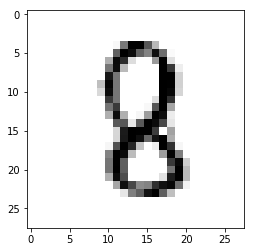

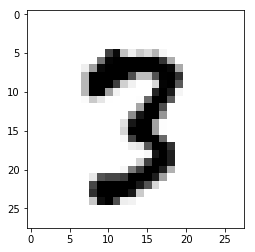

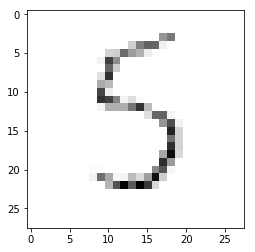

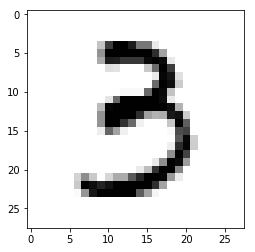

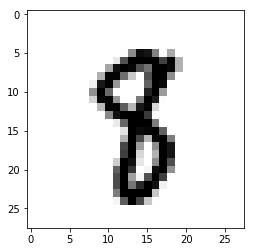

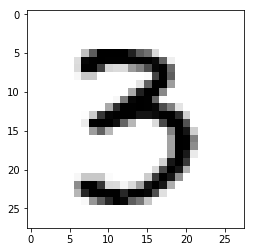

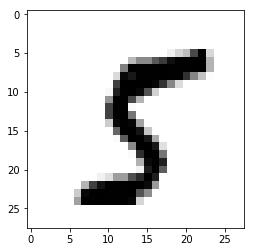

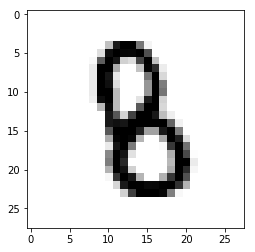

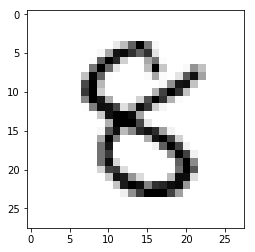

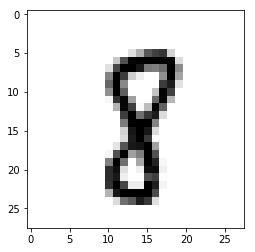

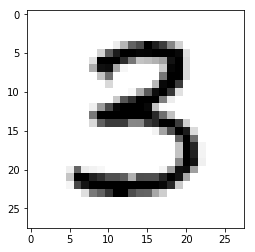

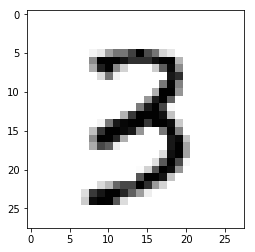

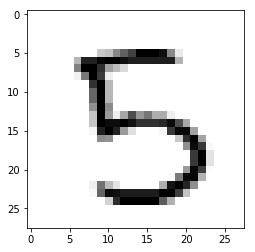

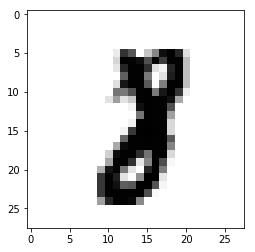

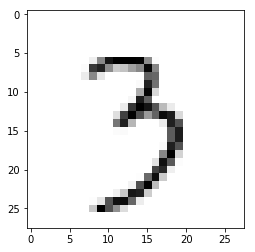

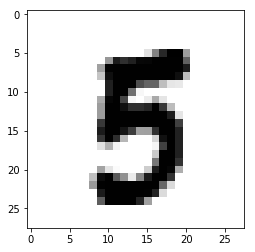

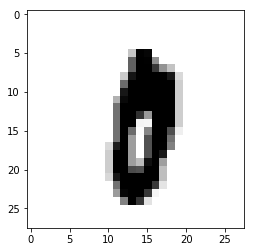

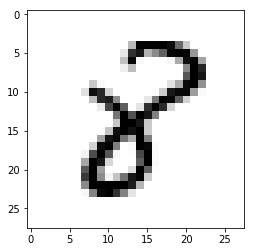

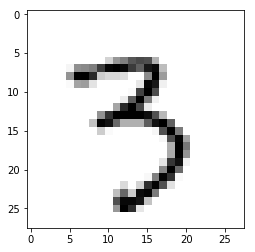

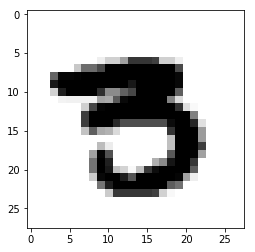

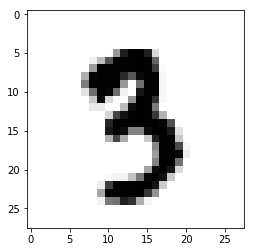

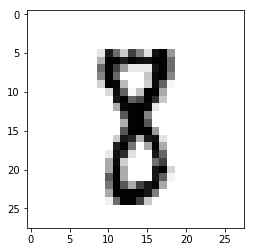

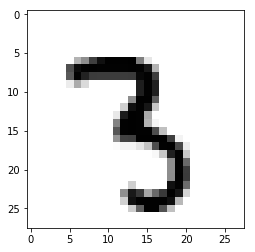

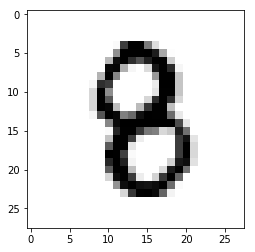

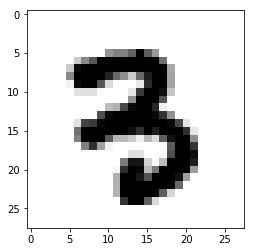

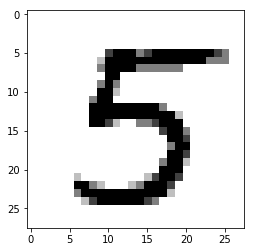

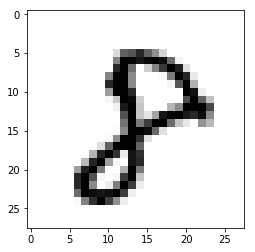

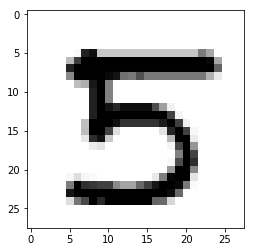

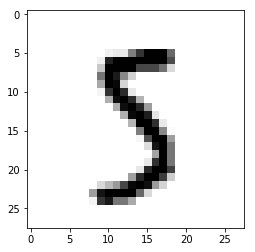

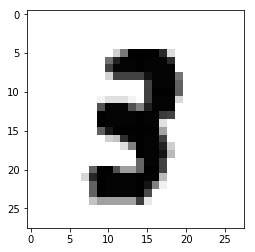

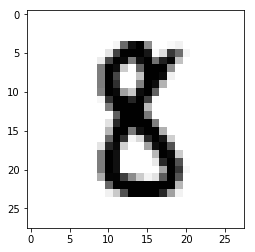

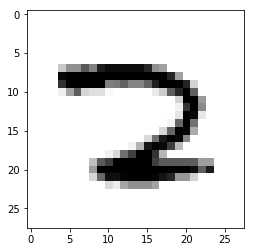

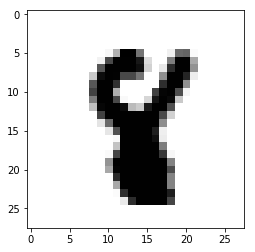

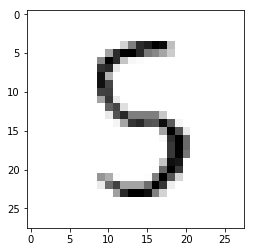

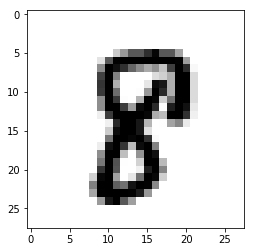

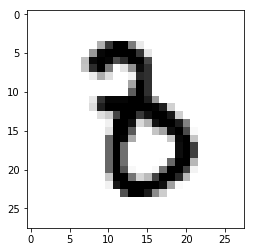

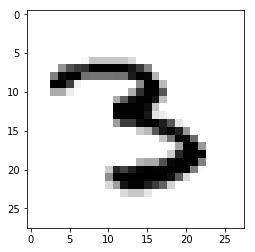

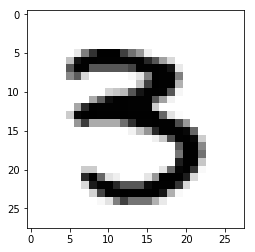

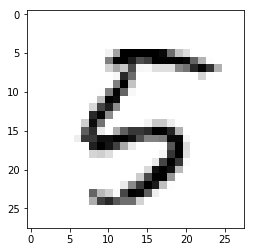

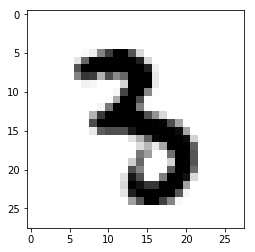

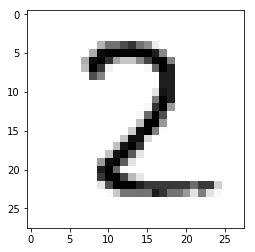

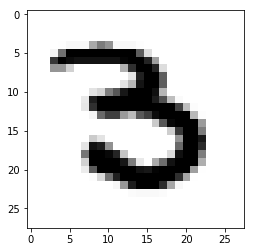

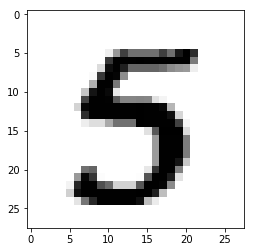

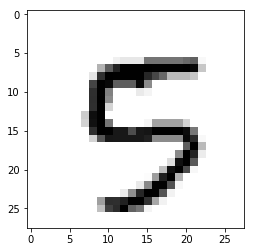

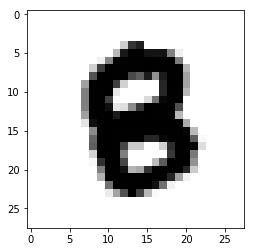

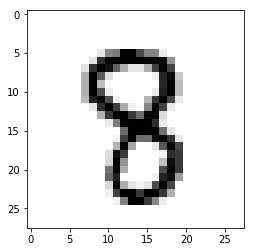

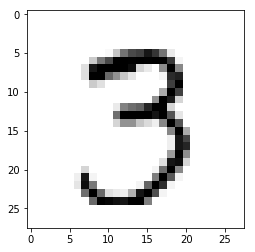

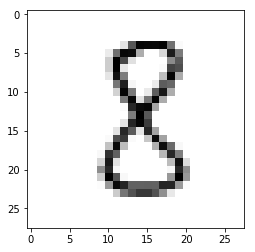

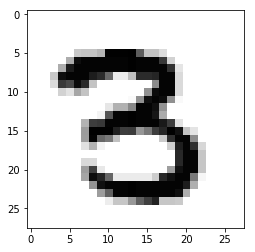

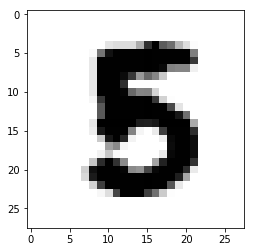

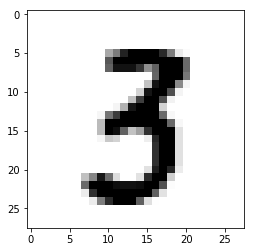

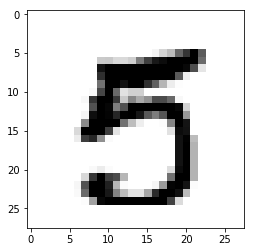

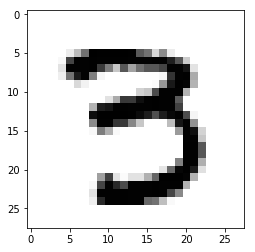

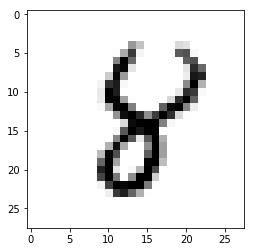

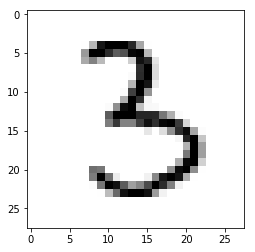

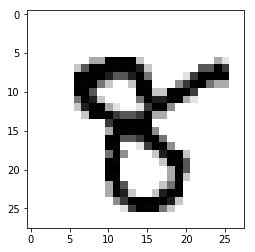

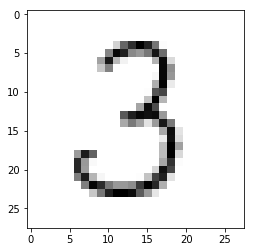

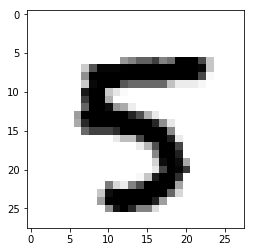

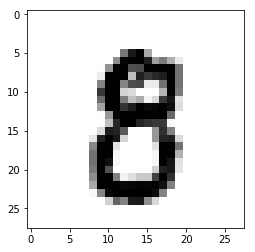

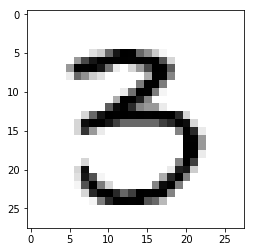

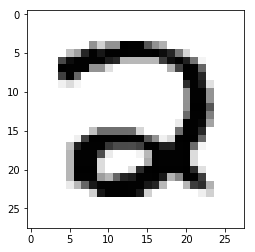

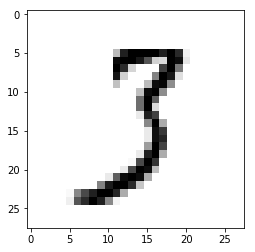

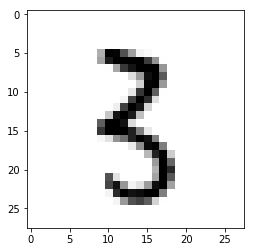

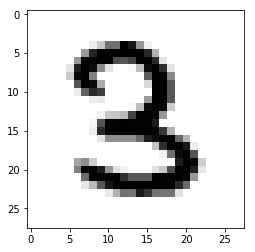

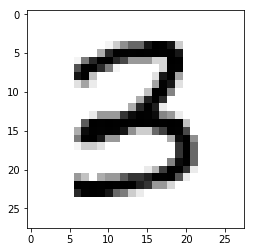

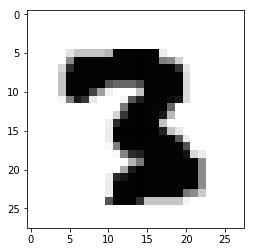

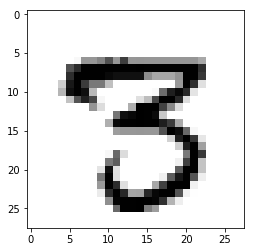

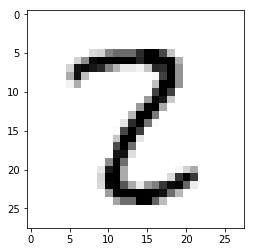

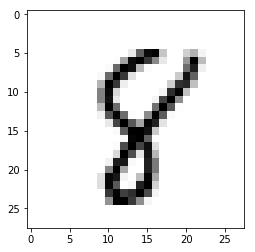

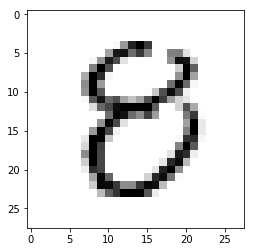

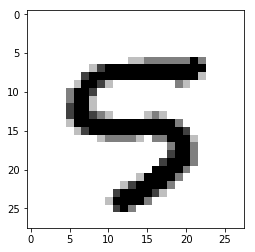

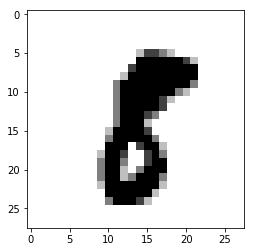

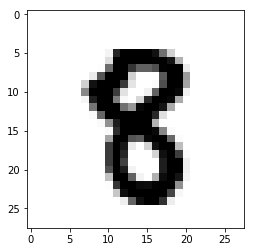

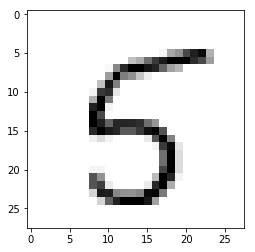

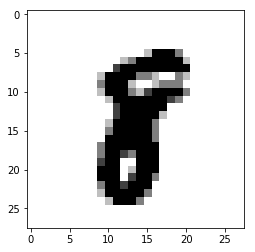

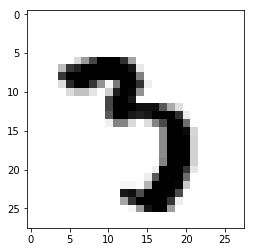

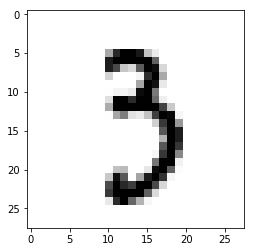

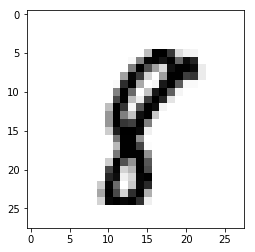

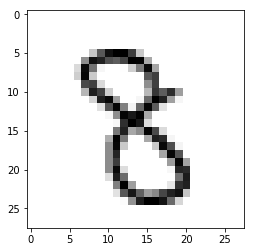

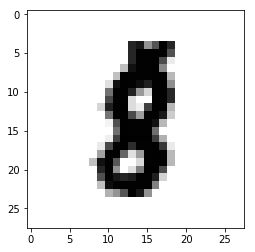

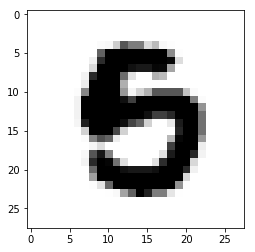

In [24]:
display_100(best_ward, 2)

#### (18) Store the best clustering objects (`best_ward`, `best_complete`, `best_average`) in a single file using standard `numpy` functionality. The name of the file must be `best_clusters.npz`. Load them back and verify they are correct. [2 marks] 

In [25]:
np.savez('best_clustering.npz', best_ward=best_ward, best_complete=best_complete, best_average=best_average) # save the objects
clustering_file = np.load('best_clustering.npz') # load the file
clustering_file.files
print (clustering_file['best_ward']) # verify the results by printing the objects of the file
print (clustering_file['best_complete'])
print (clustering_file['best_average'])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f1288b09f50>)
AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f1288b09f50>)
AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=10,
            pooling_func=<function mean at 0x7f1288b09f50>)
